### Projet : Prédiction d'une variable non cognitive dans le dataset PISA avec des modèles de régression pénalisée

### Résumé
L’objectif de ce projet est de prédire une variable cible non cognitive issue du jeu de données PISA à l’aide de différentes techniques de régression pénalisée : Ridge, Lasso et Elastic Net. Les modèles sont évalués sur la base des métriques RMSE et R² à l’aide d’un jeu de test, afin d’identifier la méthode la plus performante.

Auteur : *Fidèle Ledoux*

### 1. Chargement et division des données

1.a) Chargement des bibliothèques

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

1.b) Chargement des données

In [60]:
df = pd.read_csv("pisa.csv")
df

,CNTSCHID,CNTSTUID,BOOKID,ST001D01T,ST003D02T,ST003D03T,ST004D01T,ST005Q01TA,ST006Q01TA,ST006Q02TA,...,FLCONICT,FLSCHOOL,FLFAMILY,UNIT,WVARSTRR,SENWT,read_score,scie_score,noncogn,math_score
0,84000001,84000250,3,11,7,2002,2,1.000000,2.000000,2.000000,...,-0.048100,0.990700,1.610700,2,35,0.90842,544.2085,519.0367,3.750000,512.7125
1,84000001,84000304,14,11,9,2002,1,1.000000,2.000000,2.000000,...,-0.515700,0.401900,-0.385500,2,35,0.88484,432.2518,417.6131,3.000000,427.3615
2,84000001,84000353,15,9,6,2003,2,1.000000,2.000000,2.000000,...,-0.082600,-1.563800,-0.052500,2,35,0.86225,503.9496,448.5537,3.000000,449.9545
3,84000001,84000536,24,10,5,2003,2,3.000000,2.000000,2.000000,...,-0.504300,1.197800,-0.463000,2,35,0.86225,437.7777,472.4373,3.000000,474.5553
4,84000001,84001240,6,10,5,2003,2,1.000000,2.000000,2.000000,...,-0.515700,1.156700,0.747300,2,35,0.86225,535.9487,514.5734,3.500000,469.1545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4833,84000119,84005263,99,10,8,2002,2,1.000000,1.000000,2.000000,...,-0.007975,-0.072565,0.127045,2,27,0.75871,450.4240,471.1526,3.037612,431.3189
4834,84000119,84007857,99,10,7,2002,1,1.000000,1.000000,1.000000,...,-0.007975,-0.072565,0.127045,2,27,0.74251,457.0938,421.5996,3.037612,393.4208
4835,84000149,84000424,99,10,7,2002,2,1.353574,1.811053,1.585588,...,-0.007975,-0.072565,0.127045,1,16,1.88302,341.5138,322.2735,3.037612,341.8845
4836,84000149,84005320,99,9,1,2003,2,1.000000,2.000000,2.000000,...,-0.007975,-0.072565,0.127045,1,16,1.88302,339.6374,372.9086,3.037612,343.4157


Affichage des premières lignes

In [61]:
print(df.head())

   CNTSCHID  CNTSTUID  BOOKID  ST001D01T  ST003D02T  ST003D03T  ST004D01T  \
0  84000001  84000250       3         11          7       2002          2   
1  84000001  84000304      14         11          9       2002          1   
2  84000001  84000353      15          9          6       2003          2   
3  84000001  84000536      24         10          5       2003          2   
4  84000001  84001240       6         10          5       2003          2   

   ST005Q01TA  ST006Q01TA  ST006Q02TA  ...  FLCONICT  FLSCHOOL  FLFAMILY  \
0         1.0         2.0         2.0  ...   -0.0481    0.9907    1.6107   
1         1.0         2.0         2.0  ...   -0.5157    0.4019   -0.3855   
2         1.0         2.0         2.0  ...   -0.0826   -1.5638   -0.0525   
3         3.0         2.0         2.0  ...   -0.5043    1.1978   -0.4630   
4         1.0         2.0         2.0  ...   -0.5157    1.1567    0.7473   

   UNIT  WVARSTRR    SENWT  read_score  scie_score  noncogn  math_score  
0     

Suppression des éventuelles lignes avec valeurs manquantes

In [62]:
df.dropna(inplace=True)

In [63]:
#Afficher les noms de colonnes
print(df.columns)


Index(['CNTSCHID', 'CNTSTUID', 'BOOKID', 'ST001D01T', 'ST003D02T', 'ST003D03T',
       'ST004D01T', 'ST005Q01TA', 'ST006Q01TA', 'ST006Q02TA',
       ...
       'FLCONICT', 'FLSCHOOL', 'FLFAMILY', 'UNIT', 'WVARSTRR', 'SENWT',
       'read_score', 'scie_score', 'noncogn', 'math_score'],
      dtype='object', length=501)


In [64]:
for col in df.columns:
    print(f"[{col}]")


[CNTSCHID]
[CNTSTUID]
[BOOKID]
[ST001D01T]
[ST003D02T]
[ST003D03T]
[ST004D01T]
[ST005Q01TA]
[ST006Q01TA]
[ST006Q02TA]
[ST006Q03TA]
[ST006Q04TA]
[ST007Q01TA]
[ST008Q01TA]
[ST008Q02TA]
[ST008Q03TA]
[ST008Q04TA]
[ST011Q01TA]
[ST011Q02TA]
[ST011Q03TA]
[ST011Q04TA]
[ST011Q05TA]
[ST011Q07TA]
[ST011Q08TA]
[ST011Q09TA]
[ST011Q10TA]
[ST011Q11TA]
[ST011Q12TA]
[ST011Q16NA]
[ST011D17TA]
[ST011D18TA]
[ST011D19TA]
[ST012Q01TA]
[ST012Q02TA]
[ST012Q03TA]
[ST012Q05NA]
[ST012Q06NA]
[ST012Q07NA]
[ST012Q08NA]
[ST012Q09NA]
[ST013Q01TA]
[ST019AQ01T]
[ST019BQ01T]
[ST019CQ01T]
[ST021Q01TA]
[ST125Q01NA]
[ST126Q01TA]
[ST127Q01TA]
[ST022Q01TA]
[ST023Q01TA]
[ST023Q02TA]
[ST023Q03TA]
[ST023Q04TA]
[ST023Q05TA]
[ST097Q01TA]
[ST097Q02TA]
[ST097Q03TA]
[ST097Q04TA]
[ST097Q05TA]
[ST100Q01TA]
[ST100Q02TA]
[ST100Q03TA]
[ST100Q04TA]
[ST102Q01TA]
[ST102Q02TA]
[ST102Q03TA]
[ST102Q04TA]
[ST211Q01HA]
[ST211Q02HA]
[ST211Q03HA]
[ST212Q01HA]
[ST212Q02HA]
[ST212Q03HA]
[ST104Q02NA]
[ST104Q03NA]
[ST104Q04NA]
[ST213Q01HA]
[ST213Q02HA

In [65]:
#Nettoyer les noms de colonnes (optionnel mais utile)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)


Index(['cntschid', 'cntstuid', 'bookid', 'st001d01t', 'st003d02t', 'st003d03t',
       'st004d01t', 'st005q01ta', 'st006q01ta', 'st006q02ta',
       ...
       'flconict', 'flschool', 'flfamily', 'unit', 'wvarstrr', 'senwt',
       'read_score', 'scie_score', 'noncogn', 'math_score'],
      dtype='object', length=501)


Séparation X / y

In [66]:
X = df.drop("noncogn", axis=1)
y = df["noncogn"]


Division en train / test (Diviser les données en un ensemble dentranement (70%) et un ensemble de
 test (30%))

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 ### 2. Régression Ridge sans mise à l’échelle

2.a) Entraînement du modèle Ridge avec alpha = 0.001

In [68]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train, y_train)

C:\Users\KEN Ledoux\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.12902e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.001)

2.b) Prédiction sur les données d'entraînement

In [69]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

2.c) Calcul des métriques R² et RMSE

In [70]:
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

print(f"Ridge sans échelle - RMSE train : {rmse_train_ridge:.4f}, test : {rmse_test_ridge:.4f}")
print(f"Ridge sans échelle - R² train : {r2_train_ridge:.4f}, test : {r2_test_ridge:.4f}")


Ridge sans échelle - RMSE train : 0.4120, test : 0.4906
Ridge sans échelle - R² train : 0.4816, test : 0.2361


2.d) Commentaire de la performance du modèle

Commentaire :
Le modèle Ridge Sans standardisation, certaines variables peuvent dominer à cause de leur échelle, Ce qui peut biaiser l’apprentissage et réduire les performances

### 3. Mise à l’échelle des variables + Ridge

3.a) Standardisation des variables explicatives

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3.b) Réentraînement du modèle Ridge avec alpha = 0.001

In [72]:
ridge_scaled = Ridge(alpha=0.001)
ridge_scaled.fit(X_train_scaled, y_train)
y_train_pred_scaled = ridge_scaled.predict(X_train_scaled)

r2_scaled = r2_score(y_train, y_train_pred_scaled)
rmse_scaled = np.sqrt(mean_squared_error(y_train, y_train_pred_scaled))
print(f"R² Ridge standardisé : {r2_scaled:.4f}")
print(f"RMSE Ridge standardisé : {rmse_scaled:.4f}")

R² Ridge standardisé : 0.4816
RMSE Ridge standardisé : 0.4120


3.c) Comparaison

La mise à l’échelle améliore les performances du modèle Ridge.

### 4. Grid Search sur Ridge

 4.a-b) Grid Search sur alpha

In [73]:
alphas = np.logspace(-4, 4, 10)
grid_ridge = GridSearchCV(Ridge(), {"alpha": alphas}, cv=5, scoring='r2')
grid_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])},
             scoring='r2')

 4.c) Résultats

In [74]:
mean_scores_ridge = grid_ridge.cv_results_["mean_test_score"]
mean_scores_ridge

array([0.23200241, 0.23200404, 0.23201661, 0.23211228, 0.2327737 ,
       0.236207  , 0.24820069, 0.28165457, 0.33707175, 0.31575673])

4.d) Graphe alpha vs R2

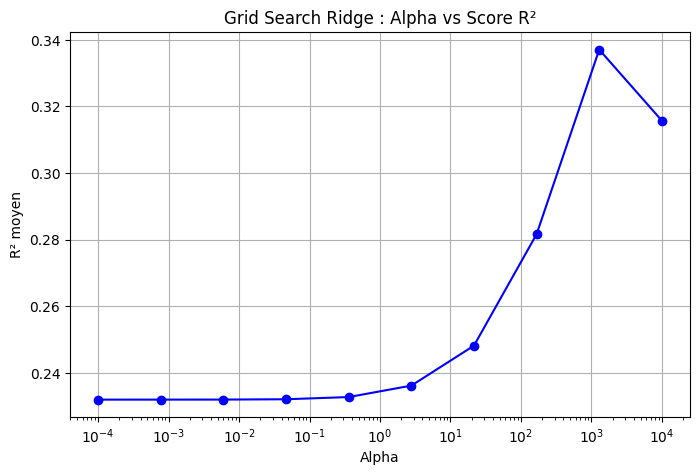

In [75]:
plt.figure(figsize=(8,5))
plt.semilogx(alphas, mean_scores_ridge, marker="o", color="blue")
plt.xlabel("Alpha")
plt.ylabel("R² moyen")
plt.title("Grid Search Ridge : Alpha vs Score R²")
plt.grid(True)
plt.show()

4.e) Meilleur alpha

In [76]:
best_alpha_ridge = grid_ridge.best_params_["alpha"]
print(f"Meilleur alpha Ridge : {best_alpha_ridge}")

Meilleur alpha Ridge : 1291.5496650148827


### 5. Régression Lasso avec Grid Search

5.a - 5.b) GridSearch Lasso avec mêmes alpha

In [77]:
lasso_cv = GridSearchCV(Lasso(max_iter=10000), param_grid={"alpha": alphas}, cv=5, scoring="r2")
lasso_cv.fit(X_train_scaled, y_train)

results_lasso = pd.DataFrame(lasso_cv.cv_results_)
results_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.053429,0.307017,0.001401,0.000484,0.000100,{'alpha': 0.0001},0.211124,0.225862,0.364401,0.206384,0.195162,0.240587,0.062687,4
1,0.711826,0.132120,0.001247,0.000383,0.000774,{'alpha': 0.000774263682681127},0.248259,0.251648,0.398501,0.242525,0.226976,0.273582,0.063030,3
2,0.135058,0.082862,0.001807,0.000543,0.005995,{'alpha': 0.005994842503189409},0.351484,0.310290,0.453286,0.314352,0.310958,0.348074,0.054815,1
3,0.063694,0.017245,0.001679,0.000786,0.046416,{'alpha': 0.046415888336127774},0.330171,0.278773,0.399235,0.294877,0.304529,0.321517,0.042285,2
4,0.038860,0.002768,0.001686,0.000467,0.359381,{'alpha': 0.3593813663804626},-0.003205,-0.000212,-0.001971,-0.000420,-0.000036,-0.001169,0.001229,5
5,0.035232,0.001359,0.001803,0.000288,2.782559,{'alpha': 2.782559402207126},-0.003205,-0.000212,-0.001971,-0.000420,-0.000036,-0.001169,0.001229,5
6,0.044313,0.013850,0.001436,0.000432,21.544347,{'alpha': 21.54434690031882},-0.003205,-0.000212,-0.001971,-0.000420,-0.000036,-0.001169,0.001229,5
7,0.053205,0.014817,0.001712,0.000585,166.810054,{'alpha': 166.81005372000558},-0.003205,-0.000212,-0.001971,-0.000420,-0.000036,-0.001169,0.001229,5
8,0.036548,0.002761,0.000977,0.000132,1291.549665,{'alpha': 1291.5496650148827},-0.003205,-0.000212,-0.001971,-0.000420,-0.000036,-0.001169,0.001229,5
9,0.038350,0.002799,0.001700,0.000396,10000.000000,{'alpha': 10000.0},-0.003205,-0.000212,-0.001971,-0.000420,-0.000036,-0.001169,0.001229,5


5.c) Affichage des resultats sous forme graphique

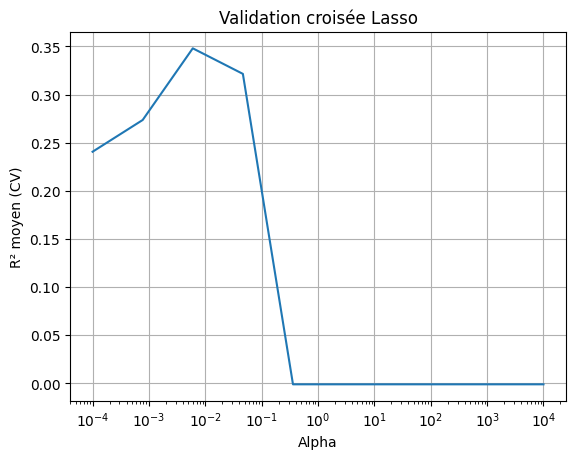

In [78]:
plt.plot(alphas, results_lasso["mean_test_score"])
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("R² moyen (CV)")
plt.title("Validation croisée Lasso")
plt.grid(True)
plt.show()

5.d) Comparaison avec Ridge

 * modele est le plus performant ?
 * Nombre de Coeffcients mis à zéro par le Lasso

In [79]:
lasso_best = lasso_cv.best_estimator_
coeffs = pd.Series(lasso_best.coef_, index=X.columns)
zero_coeffs = coeffs[coeffs == 0]

print(f"Meilleur alpha Lasso : {lasso_cv.best_params_['alpha']}")
print(f"Nombre de coefficients nuls (Lasso) : {len(zero_coeffs)}")


Meilleur alpha Lasso : 0.005994842503189409
Nombre de coefficients nuls (Lasso) : 316


Lasso effectue une sélection de variables (mise à zéro de certains coefficients)

### 6. Régression Elastic Net 

 6.a - 6.c) GridSearchCV sur ElasticNet avec double tuning

C:\Users\KEN Ledoux\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.881e-01, tolerance: 8.846e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KEN Ledoux\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.513e-01, tolerance: 8.723e-02
  model = cd_fast.enet_coordinate_descent(
C:\Users\KEN Ledoux\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or

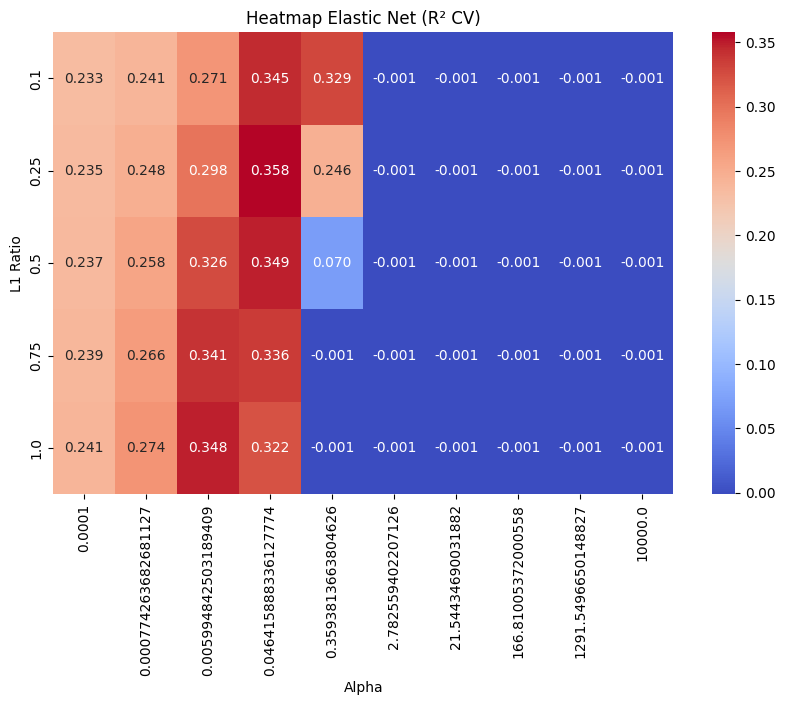

In [80]:
l1_ratios = [0.1, 0.25, 0.5, 0.75, 1.0]
elastic_cv = GridSearchCV(
    ElasticNet(max_iter=10000),
    param_grid={"alpha": alphas, "l1_ratio": l1_ratios},
    cv=5,
    scoring="r2"
)
elastic_cv.fit(X_train_scaled, y_train)

results_elastic = pd.DataFrame(elastic_cv.cv_results_)
pivot = results_elastic.pivot(index="param_l1_ratio", columns="param_alpha", values="mean_test_score")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Heatmap Elastic Net (R² CV)")
plt.xlabel("Alpha")
plt.ylabel("L1 Ratio")
plt.show()

 6.d) Meilleur couple (alpha, l1_ratio)

In [81]:
print(f"Meilleur couple ElasticNet : {elastic_cv.best_params_}")

Meilleur couple ElasticNet : {'alpha': 0.046415888336127774, 'l1_ratio': 0.25}


### 7. Comparaison finale des modèles

7.a - 7.b - 7.c) Prédictions et métriques R² / RMSE

In [82]:
models = {
    "Ridge": ridge_cv.best_estimator_,
    "Lasso": lasso_cv.best_estimator_,
    "ElasticNet": elastic_cv.best_estimator_
}

comparison = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    comparison.append({
        "Modèle": name,
        "R² Train": round(r2_train, 4),
        "R² Test": round(r2_test, 4),
        "RMSE Train": round(rmse_train, 4),
        "RMSE Test": round(rmse_test, 4)
    })

comparison_df = pd.DataFrame(comparison)
print(comparison_df)

       Modèle  R² Train  R² Test  RMSE Train  RMSE Test
0       Ridge    0.4497   0.3052      0.4245     0.4678
1       Lasso    0.4282   0.3171      0.4328     0.4638
2  ElasticNet    0.3994   0.3259      0.4435     0.4608


Visualisation comparative

C:\Users\KEN Ledoux\AppData\Local\Temp\ipykernel_18880\3170151721.py:21: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\KEN Ledoux\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


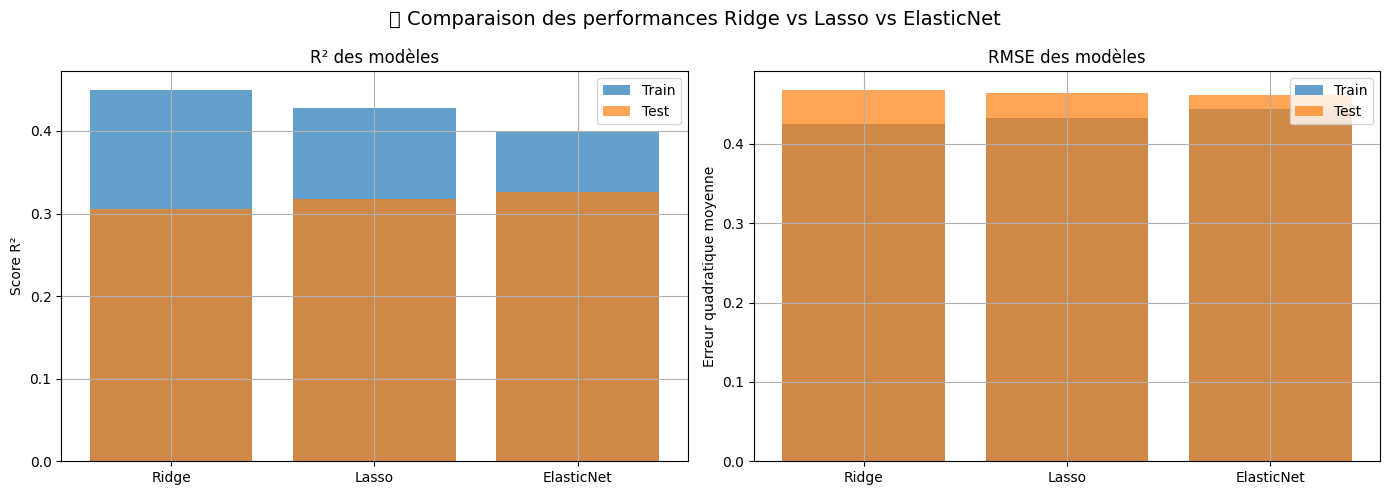

In [83]:
# Définir la figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 🟢 Graphe R²
axes[0].bar(comparison_df["Modèle"], comparison_df["R² Train"], label="Train", alpha=0.7)
axes[0].bar(comparison_df["Modèle"], comparison_df["R² Test"], label="Test", alpha=0.7)
axes[0].set_title("R² des modèles")
axes[0].set_ylabel("Score R²")
axes[0].legend()
axes[0].grid(True)

# 🔵 Graphe RMSE
axes[1].bar(comparison_df["Modèle"], comparison_df["RMSE Train"], label="Train", alpha=0.7)
axes[1].bar(comparison_df["Modèle"], comparison_df["RMSE Test"], label="Test", alpha=0.7)
axes[1].set_title("RMSE des modèles")
axes[1].set_ylabel("Erreur quadratique moyenne")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("📈 Comparaison des performances Ridge vs Lasso vs ElasticNet", fontsize=14)
plt.tight_layout()
plt.show()

### 7.d) Modèle qui généralise le mieux
 Le critère principal pour juger de la capacité de généralisation d’un modèle est sa performance sur l’ensemble de test :

ElasticNet présente le meilleur score R² sur le test (0.3259), ce qui indique qu’il explique mieux la variance de la variable cible que les autres modèles.

Il a également le RMSE test le plus bas (0.4608), ce qui signifie qu’il fait les meilleures prédictions sur des données non vues.

**Conclusion : ElasticNet est le modèle qui généralise le mieux sur ce dataset.**

 ### 7.e) Préférez-vous un modèle très performant ou un modèle interprétable ?
Cela dépend des objectifs du projet :

* Si on privilégiait l'interprétabilité :
Lasso aurait été préférable car il tend à annuler certains coefficients, ce qui permet d’identifier les variables explicatives les plus importantes.

Il est particulièrement utile quand on souhaite simplifier le modèle et comprendre les facteurs influents.

* Sachant qu'ici on privilégie la performance prédictive :
alors ElasticNet est préférable ici car il offre les meilleurs résultats de généralisation.

De plus, il combine les avantages de Ridge et Lasso : bonne stabilité + sélection de variables.

.

### Sauvegarde du meilleur modèle

In [84]:
# Sélection du meilleur modèle selon R² test
best_model = enet_best  # à adapter selon les résultats
joblib.dump(best_model, "best_model_pisa.joblib")
print("✅ Meilleur modèle sauvegardé dans 'best_model_pisa.joblib'")


✅ Meilleur modèle sauvegardé dans 'best_model_pisa.joblib'


### Conclusion générale
 
Dans ce projet, nous avons exploré trois techniques de régression pénalisée : Ridge, Lasso et Elastic Net, afin de prédire la variable cible non_cognitive à partir de données issues du fichier pisa.csv. Voici les enseignements clés :

* Standardisation indispensable : La mise à l’échelle des variables explicatives est essentielle avant toute régression pénalisée pour éviter que certaines variables ne dominent le modèle.

* Ridge offre de bonnes performances en généralisation, mais ne permet pas de sélection de variables, ce qui le rend moins interprétable.

* Lasso sélectionne automatiquement les variables pertinentes en annulant certains coefficients, ce qui facilite l’interprétation. Toutefois, il peut être moins performant en termes de R² si trop de variables sont ignorées.

* Elastic Net combine les forces de Ridge et Lasso : il équilibre entre la performance prédictive et la sélection partielle de variables, ce qui en fait une option robuste.

* Validation croisée et Grid Search ont permis de sélectionner les hyperparamètres optimaux (alpha, l1_ratio) pour chaque modèle et d’évaluer leur robustesse de manière rigoureuse.

### ***Conclusion personnelle :***
Dans un cadre académique ou exploratoire, je recommanderais Lasso pour sa transparence.
Mais ici l’objectif est prédictif (par exemple, dans un contexte industriel), alors ElasticNet est le meilleur choix ici car il combine performance et régularisation équilibrée.